# Implementación de la característica de difuminado del fondo para una herramienta de videoconferencia con MediaPipa

In [9]:
!pip install mediapipe
!pip install opencv-python mediapipe

# la librería PixelLib no funciona correctamente
# por lo tanto vamos a usar un enfoque diferente basado en OpenCV y MediaPipe


In [7]:
import cv2
import mediapipe as mp

In [14]:
# Inicializar el detector de cuerpos humanos de MediaPipe
mp_selfie_segmentation = mp.solutions.selfie_segmentation
segmenter = mp_selfie_segmentation.SelfieSegmentation(model_selection=1)


In [15]:

# Capturamos el video en tiempo real desde la cámara
cap = cv2.VideoCapture(0)  # 0 significa la cámara por defecto

In [16]:
while cap.isOpened():
    ret, frame = cap.read()  # Leemos un frame del video en tiempo real
    if not ret:
        break  # Si no se recibe el frame, termina el bucle

    # Convertimos el frame a RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Realizamos la segmentación
    results = segmenter.process(frame_rgb)

    # Obtenemos la máscara de segmentación
    mask = results.segmentation_mask

    # Convertimos la máscara a una imagen binaria para aplicarla al fondo
    condition = mask > 0.5

    # Difuminar el fondo
    blurred_frame = cv2.GaussianBlur(frame, (55, 55), 0)

    # Combinar el fondo difuminado con la persona
    output_frame = frame.copy()
    output_frame[condition] = frame[condition]  # Mantener a la persona sin cambios
    output_frame[~condition] = blurred_frame[~condition]  # Aplicar el fondo difuminado

    # Mostrar el video en tiempo real con el fondo difuminado
    cv2.imshow("Video con fondo difuminado", output_frame)

    # Salir del bucle si se presiona la tecla 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break



In [19]:

# Liberar la captura de video y cerrar las ventanas abiertas
cap.release()
cv2.destroyAllWindows()

MediaPipe, que genera una máscara donde se distingue entre la persona y el fondo.
Utilizamos el filtro GaussianBlur de OpenCV para difuminar el fondo.
 Aplicamos la máscara generada para separar a la persona del fondo, y luego combinamos el fondo difuminado con la persona sin difuminar.

# Implementación de la característica de difuminado del fondo con foto fija.

In [20]:
from google.colab import output
from IPython.display import display, Javascript

# Función para acceder a la cámara y capturar el video
def start_video_capture():
    display(Javascript('''
    var video = document.createElement("video");
    video.setAttribute("autoplay", true);
    video.setAttribute("width", 640);
    video.setAttribute("height", 480);
    document.body.appendChild(video);

    navigator.mediaDevices.getUserMedia({video: true})
        .then(function(stream) {
            video.srcObject = stream;
        });
    '''))

start_video_capture()


<IPython.core.display.Javascript object>

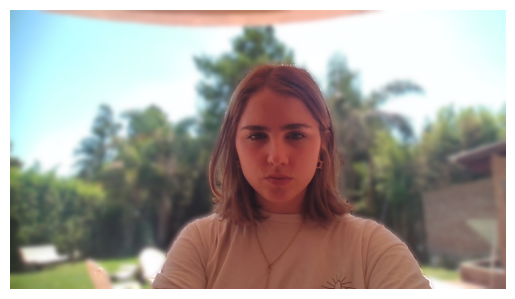

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar una imagen desde el disco
img_path = "/content/WIN_20241011_12_07_00_Pro.jpg"
frame = cv2.imread(img_path)

# Inicializar el detector de cuerpos humanos de MediaPipe
import mediapipe as mp
mp_selfie_segmentation = mp.solutions.selfie_segmentation
segmenter = mp_selfie_segmentation.SelfieSegmentation(model_selection=1)

# Convertimos el frame a RGB
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Realizamos la segmentación
results = segmenter.process(frame_rgb)

# Obtenemos la máscara de segmentación
mask = results.segmentation_mask

# Convertimos la máscara a una imagen binaria para aplicarla al fondo
condition = mask > 0.5

# Difuminar el fondo
blurred_frame = cv2.GaussianBlur(frame, (55, 55), 0)

# Combinar el fondo difuminado con la persona
output_frame = frame.copy()
output_frame[condition] = frame[condition]  # Mantener a la persona sin cambios
output_frame[~condition] = blurred_frame[~condition]  # Aplicar el fondo difuminado

# Mostrar el resultado
plt.imshow(cv2.cvtColor(output_frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


## levantar mano

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


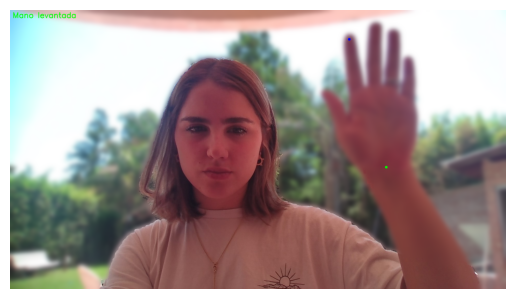

In [23]:
# Cargar una imagen desde el disco
img_path = "/content/WIN_20241011_12_09_39_Pro.jpg"
frame = cv2.imread(img_path)

# Inicializar los módulos de MediaPipe
mp_selfie_segmentation = mp.solutions.selfie_segmentation
mp_hands = mp.solutions.hands

segmenter = mp_selfie_segmentation.SelfieSegmentation(model_selection=1)
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)

# Convertimos el frame a RGB
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Realizamos la segmentación
results = segmenter.process(frame_rgb)

# Obtenemos la máscara de segmentación
mask = results.segmentation_mask

# Convertimos la máscara a una imagen binaria para aplicarla al fondo
condition = mask > 0.5

# Difuminar el fondo
blurred_frame = cv2.GaussianBlur(frame, (55, 55), 0)

# Combinar el fondo difuminado con la persona
output_frame = frame.copy()
output_frame[condition] = frame[condition]  # Mantener a la persona sin cambios
output_frame[~condition] = blurred_frame[~condition]  # Aplicar el fondo difuminado

# Detección de manos
hands_results = hands.process(frame_rgb)

# Dibujar las manos detectadas
if hands_results.multi_hand_landmarks:
    for hand_landmarks in hands_results.multi_hand_landmarks:
        # Obtener las coordenadas de la muñeca
        wrist = hand_landmarks.landmark[mp_hands.HandLandmark.WRIST]
        x_wrist = int(wrist.x * frame.shape[1])
        y_wrist = int(wrist.y * frame.shape[0])

        # Obtener las coordenadas del dedo índice
        index_finger = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP]
        x_index = int(index_finger.x * frame.shape[1])
        y_index = int(index_finger.y * frame.shape[0])

        # Dibujar la muñeca
        cv2.circle(output_frame, (x_wrist, y_wrist), 5, (0, 255, 0), -1)

        # Dibujar el dedo índice
        cv2.circle(output_frame, (x_index, y_index), 5, (255, 0, 0), -1)

        # Condición para detectar si la mano está levantada
        if y_index < y_wrist:  # Si la punta del dedo índice está por encima de la muñeca
            cv2.putText(output_frame, "Mano levantada", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

# Mostrar el resultado
plt.imshow(cv2.cvtColor(output_frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
